In [1]:
import sys
sys.path.append('../src/')

In [2]:
# Third-party libraries:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# My libraries:
import dataset.dataset as dtset
from dbclass import dbclass_utils as db_utils

In [3]:
# import some data to play with
ds = load_digits()
ds['data'] = db_utils.get_pca_data(ds['data'], n_components=15)
# Splitting the data for trainning and for test:
ds_train, ds_validation = dtset.split_data(ds, prop_train=0.5)
ds_validation, ds_test = dtset.split_data(ds_validation, prop_train=0.5)
ds_train = dtset.join_data((ds_train, ds_validation))

In [4]:
# Train a SVM classification model
# Fitting the classifier to the training set:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
                'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                    param_grid, cv=5, n_jobs=4)
clf = clf.fit(ds_train['data'], ds_train['target'])
print("\nBest estimator found by grid search:")
print(clf.best_estimator_)


Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.1)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.49      1.00      0.66        46
           2       0.87      1.00      0.93        45
           3       0.74      0.91      0.82        46
           4       0.86      0.96      0.91        46
           5       0.70      0.98      0.82        46
           6       0.92      0.98      0.95        46
           7       0.62      1.00      0.77        45
           8       0.28      0.89      0.43        44
           9       0.72      0.91      0.80        45
     Unknown       0.00      0.00      0.00       227

    accuracy                           0.64       681
   macro avg       0.65      0.87      0.73       681
weighted avg       0.48      0.64      0.54       681


Confusion matrix:


C:\Users\weldl\Miniconda3\envs\dbclass\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\weldl\Miniconda3\envs\dbclass\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\weldl\Miniconda3\envs\dbclass\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


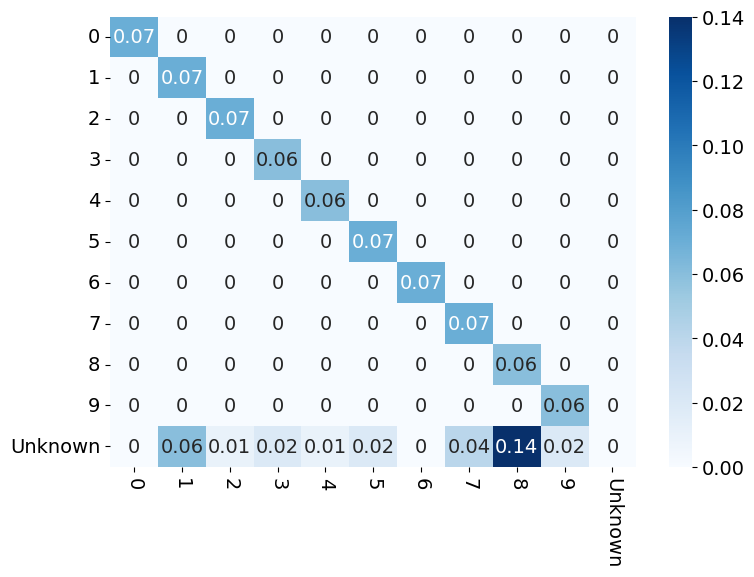

accuracy 0.673469


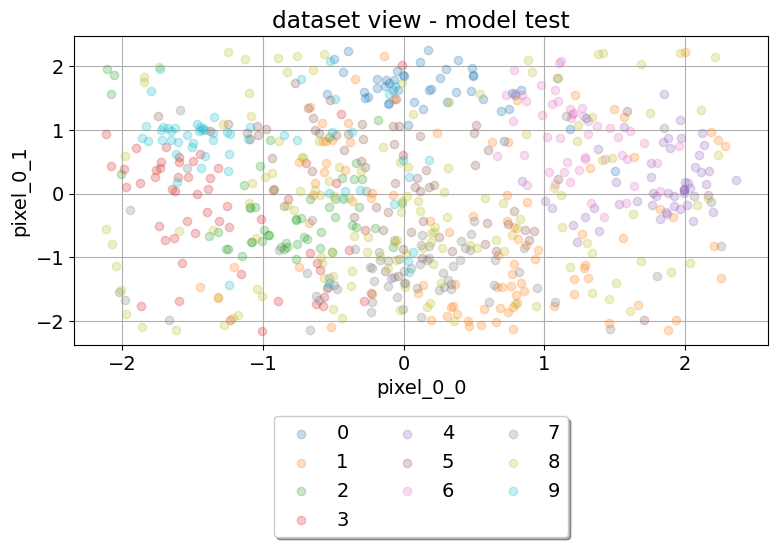

In [5]:
# Quantitative evaluation of the model quality on the test set:
ds_test = dtset.insert_rand_noclass(ds_test)
y_pred = clf.predict(ds_test['data'])
ds_pred = db_utils.print_classification_report(ds_test, y_pred)
confusion_matrix = db_utils.build_confusion_matrix(ds_test['target'], y_pred)

print('\nConfusion matrix:')
cmap = 'Blues'
noclass_label = "Unknown"
vmin = min([0, confusion_matrix.min()])
vmax = max([confusion_matrix.max()])    
plt.figure()
sns.heatmap(confusion_matrix, annot=np.round(confusion_matrix, 2), cmap=cmap, vmin=vmin, vmax=vmax)
target_names = [str(x) for x in ds_test['target_names']] + [noclass_label]
target_idxs = [i+0.5 for i in range(len(target_names))]
plt.xticks(target_idxs, target_names, rotation=-90)
plt.yticks(target_idxs, target_names, rotation=0)
plt.tight_layout()
plt.show()

class_metrics = db_utils.get_class_metrics(confusion_matrix)
for metric in class_metrics.keys():
    print(metric, class_metrics[metric])
dtset.plot_dataset(ds_pred, feat_index=(0, 1), labeled=True, fig_name="model test")